<a href="https://colab.research.google.com/github/ekajanuartati/StudyGit/blob/main/Project_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Cleaning**




*   AirBnB merupakan layanan online yang menyediakan jasa sewa rumah atau apartemen yang tersebar di berbagai penjuru dunia.
*   Perusahaan ini memiliki data-data properti yang mereka sewakan



Dalam studi kasus kali ini kita akan melakukan analisis data untuk mencari informasi mengenai:



*   Jumlah host yang mendaftar dari tahun ke tahun
*   Jumlah host yang response ratenya diatas 70% di masing-masing tipe property


*  Distribusi response time host
*  Rata-rata jumlah review masing masing tipe property





In [ ]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Overview Data**

In [ ]:
#Read data
data = pd.read_csv("listings.csv")
data.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27886,https://www.airbnb.com/rooms/27886,20250609011745,2025-06-17,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.92,4.90,4.78,0363 974D 4986 7411 88D8,f,1,0,1,0,1.85
1,28871,https://www.airbnb.com/rooms/28871,20250609011745,2025-06-17,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.94,4.84,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.93
2,29051,https://www.airbnb.com/rooms/29051,20250609011745,2025-06-17,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.79,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.74
3,44391,https://www.airbnb.com/rooms/44391,20250609011745,2025-06-17,previous scrape,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,194779,...,4.90,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.23
4,47061,https://www.airbnb.com/rooms/47061,20250609011745,2025-06-17,city scrape,Charming apartment in old centre,"A beautiful, quiet apartment in the center of ...",NaN,https://a0.muscache.com/pictures/268343/a08ce2...,211696,...,4.90,4.85,4.63,0363 1266 8C04 4133 E6AC,f,1,1,0,0,1.13


Tampilkan Summary data

In [ ]:
#ekstrak ukuran data
nrows, ncols = data.shape
print(f"Data Input) : ({nrows}, {ncols}) - (#jumlah observasi, #jumlah fitur)")

Data Input) : (10168, 79) - (#jumlah observasi, #jumlah fitur)


In [ ]:
#mengubah setting dispaly rows, maksimum dari pandas dataframe
pd.set_option("display.max_rows",
              len(data.columns))

In [ ]:
#cek informasi umum dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10168 non-null  int64  
 1   listing_url                                   10168 non-null  object 
 2   scrape_id                                     10168 non-null  int64  
 3   last_scraped                                  10168 non-null  object 
 4   source                                        10168 non-null  object 
 5   name                                          10168 non-null  object 
 6   description                                   9859 non-null   object 
 7   neighborhood_overview                         5258 non-null   object 
 8   picture_url                                   10168 non-null  object 
 9   host_id                                       10168 non-null 



*   Ada 10168 observasi
*   Data memiliki 79 Fitur


*   Tipe - tipe fitur observasi, antara lain: numerik, kategorik, teks, dan timeseries








Cek data duplikat

In [ ]:
data.duplicated().any()

#tidak ada data yang duplikat

np.False_

Cek missing Value

In [ ]:
data.isna().any().sum()
#ada 33 kolom yang punya missing values

np.int64(39)

In [ ]:
#Tampilkan kolom yang punya missing value

#1. buat tempat menyimpan kolom missing value
col_with_missing_value = [] #list

#2. Lakukan perulangan setiap kolom
for col in data.columns:

    #3. jika ada nilai missing value didalam kolom tersebut,
    #masukkan col ke dalam col_with_missing_value
    if data [col].isna().any() == True:
      col_with_missing_value.append(col)

#4. Tampilkan column dengan missing values
col_with_missing_value

['description',
 'neighborhood_overview',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'price',
 'calendar_updated',
 'has_availability',
 'estimated_revenue_l365d',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

Hasil pengecekan karakteristik data

*   Ada 39 dari 79 kolom yang memiliki missing values
*   Untuk analisa data, masing values ini harus dibersihkan agar tidak menganggu proses analisa.
    

*   Bisa di-drop
*   Atau di-imputasi








**Data Processing & Data Cleaning**



1. Get relevan data

Dalam kasus kali ini, tidak semua data didalam dataset dibutuhkan. Untuk menghemat waktu dan meng-efektifkan proses pengolahan, kita akan mengakses kolom-kolom yang dibutuhkan dalam kasus kali ini. Kolom tersebut antara lain:

- host_since - date that the host first joined Airbnb
- host_response_time - average amount of time the host takes to reply to messages
- host_response_rate - proportion of messages that the host replies to
- property_type - type of property, e.g. house or flat
- accommodates - how many people the property accommodates
- bathrooms - number of bathrooms
- bedrooms - number of bedrooms
- price - nightly advertised price (the target variable)
- number_of_reviews - the number of reviews left for the property

Selain itu akan mengambil informasi tambahan berupa id dna nama dari host

In [ ]:
# daftar kolom yang akan digunakan
columns_to_be_used = ["id",
                     "host_name",
                     "host_since",
                     "host_response_time",
                     "host_response_rate",
                     "property_type",
                     "accommodates",
                     "bathrooms",
                     "bedrooms",
                     "price",
                     "number_of_reviews"]

# Filter data
listings_filtered = data[columns_to_be_used]

# menampilkan dimensi dataframe
listings_filtered.head()

,id,host_name,host_since,host_response_time,host_response_rate,property_type,accommodates,bathrooms,bedrooms,price,number_of_reviews
0,27886,Flip,2010-03-23,within an hour,100%,Private room in houseboat,2,1.5,1.0,$132.00,302
1,28871,Edwin,2010-05-13,within an hour,100%,Private room in rental unit,2,1.0,1.0,$78.00,710
2,29051,Edwin,2010-05-13,within an hour,100%,Private room in condo,2,1.0,1.0,$70.00,822
3,44391,Jan,2010-08-08,NaN,NaN,Entire rental unit,4,NaN,2.0,NaN,42
4,47061,Ivar,2010-08-24,within a few hours,100%,Entire rental unit,3,1.5,2.0,$120.00,203


In [ ]:
# info dataset
listings_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10168 non-null  int64  
 1   host_name           10164 non-null  object 
 2   host_since          10164 non-null  object 
 3   host_response_time  6640 non-null   object 
 4   host_response_rate  6640 non-null   object 
 5   property_type       10168 non-null  object 
 6   accommodates        10168 non-null  int64  
 7   bathrooms           6377 non-null   float64
 8   bedrooms            9874 non-null   float64
 9   price               6321 non-null   object 
 10  number_of_reviews   10168 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 873.9+ KB


Dari informasi diatas terlihat bebapa kolom tidak sesuai antara representasi dan tipe data dari kolom tersebut. Kolom-kolom tersebut antara lain:

host_since: data tanggal yang bertipe object
host_response_rate: data persentase yang bertipe object
price: data harga yang bertipe object
Kita akan menangani permasalahan ini terlebih dahulu di section berikutnya.

2. Cek dan Handle Tipe Kolom yang tidak sesuai dengan representasi data

Dari hasil pengecekan sebelumnya diketahui beberapa kolom tidak sesuai antara representasi datanya dan tipe data dari kolom tersebut. Kolom tersebut yaitu:

host_since: data tanggal yang bertipe object
host_response_rate: data persentase yang bertipe object
price: data harga yang bertipe object

2.1 Menangani kolom host_since


Karena kolom ini merepresentasikan tipe data tanggal, maka kita akan melakukan parsing terhadap data tanggal tersebut.

In [ ]:
# cek data pada kolom host_since
listings_filtered.host_since.head()

,host_since
0,2010-03-23
1,2010-05-13
2,2010-05-13
3,2010-08-08
4,2010-08-24


Karena pada data tanggal ini, diawali dengan tahun maka kita akan mengubah nilai dari parameter yearfirst pada fungsi to_datetime

In [ ]:
# Convert kolom host_since
listings_filtered.host_since = pd.to_datetime(listings_filtered.host_since, yearfirst=True)

# Tampilkan data tanggal setelah diconvert
listings_filtered.host_since

/tmp/ipython-input-1415333865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_since = pd.to_datetime(listings_filtered.host_since, yearfirst=True)


,host_since
0,2010-03-23
1,2010-05-13
2,2010-05-13
3,2010-08-08
4,2010-08-24
...,...
10163,2025-06-06
10164,2013-06-29
10165,2016-02-10
10166,2024-05-06


 telah berhasil mengubah tipe data tanggal menjadi datetime

2.2 Menangani kolom host_response_rate

Kolom ini merepresentasikan persentase respon dari host. Kita akan mengubah kolom ini sehingga memiliki tipe numerik dan menambahkan keterangan pada nama kolom untuk memperjelas persentase dari kolom tersebut.

In [ ]:
# cek data pada kolom host_response_rate
listings_filtered.host_response_rate.head()

,host_response_rate
0,100%
1,100%
2,100%
3,NaN
4,100%


Agar data dapat diconvert menjadi tipe numerik, kita akan menghilakan tanda percent yang ada pada data.

In [ ]:
# Menghapus tanda percent
listings_filtered.host_response_rate = listings_filtered.host_response_rate.str.replace("%", "")
listings_filtered.host_response_rate

/tmp/ipython-input-1524899480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_response_rate = listings_filtered.host_response_rate.str.replace("%", "")


,host_response_rate
0,100
1,100
2,100
3,NaN
4,100
...,...
10163,NaN
10164,NaN
10165,NaN
10166,80


In [ ]:
# Mengconvert tipe data menjadi int
listings_filtered.host_response_rate = listings_filtered.host_response_rate.astype(int)
listings_filtered.host_response_rate

ValueError: cannot convert float NaN to integer

Terlihat kita tidak dapat langsung menconvert kolom tersebut menjadi bertipe integer karena terdapat missing values. Untuk mengatasinya, untuk sementara kita akan mengubah NaN menjadi nilai -1 kemudian menconvert tipe data menjadi int. Setelah itu kita akan mengembalikan nilai -1 menjadi NaN

In [ ]:
# Mengisi nan dengan -1
listings_filtered.host_response_rate.fillna(-1, inplace=True)

# Mengubah tipe data menjadi int
listings_filtered.host_response_rate = listings_filtered.host_response_rate.astype(np.int64)

# mengembalikan -1 manjadi nan
listings_filtered.host_response_rate.replace(-1, np.nan, inplace=True)

# menampilkan data host_response_rate
listings_filtered.host_response_rate

/tmp/ipython-input-3230075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_response_rate.fillna(-1, inplace=True)
/tmp/ipython-input-3230075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_filtered.host_response_rate = listings_filtered.host_response_rate.astype(np.int64)
/tmp/ipython-input-3230075.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inter

,host_response_rate
0,100.0
1,100.0
2,100.0
3,NaN
4,100.0
...,...
10163,NaN
10164,NaN
10165,NaN
10166,80.0


In [ ]:
# Mengubah nama kolom sehingga represntatif
listings_filtered = listings_filtered.rename(columns = {'host_response_rate':'percent_host_response_rate'})
listings_filtered.percent_host_response_rate

,percent_host_response_rate
0,100.0
1,100.0
2,100.0
3,NaN
4,100.0
...,...
10163,NaN
10164,NaN
10165,NaN
10166,80.0


2.3 Menangani kolom price

Kolom price merepresentasikan harga sewa dari properti tersebut. Data ini seharusnya bertipe numerik. Kita akan mengubah kolom ini sehingga bertipe numerik.

In [ ]:
# cek data pada kolom price
listings_filtered.price

,price
0,$132.00
1,$78.00
2,$70.00
3,NaN
4,$120.00
...,...
10163,$258.00
10164,$350.00
10165,$263.00
10166,$300.00


In [ ]:
# Data unik pada kolom price
listings_filtered.price.unique()

array(['$132.00', '$78.00', '$70.00', nan, '$120.00', '$284.00',
       '$457.00', '$198.00', '$139.00', '$200.00', '$59.00', '$407.00',
       '$279.00', '$265.00', '$63.00', '$248.00', '$203.00', '$158.00',
       '$237.00', '$267.00', '$687.00', '$116.00', '$180.00', '$179.00',
       '$450.00', '$1,036.00', '$188.00', '$169.00', '$854.00', '$133.00',
       '$325.00', '$136.00', '$245.00', '$299.00', '$190.00', '$580.00',
       '$150.00', '$123.00', '$241.00', '$170.00', '$157.00', '$60.00',
       '$355.00', '$250.00', '$630.00', '$500.00', '$215.00', '$210.00',
       '$175.00', '$350.00', '$225.00', '$125.00', '$101.00', '$315.00',
       '$69.00', '$86.00', '$138.00', '$143.00', '$340.00', '$283.00',
       '$318.00', '$156.00', '$124.00', '$80.00', '$249.00', '$152.00',
       '$166.00', '$148.00', '$395.00', '$87.00', '$100.00', '$160.00',
       '$233.00', '$187.00', '$476.00', '$386.00', '$129.00', '$300.00',
       '$72.00', '$294.00', '$122.00', '$130.00', '$499.00', '$1

Dari informasi diatas:


*  Setiap data harga diawali dengan simbol $
*  Untuk harga yang mencapai ribuan, satuannya menggunakan tanda koma.



*   Agar bisa diconvert menjadi data numerik kita akan menghilangkan kedua tanda tersebut.












In [ ]:
# menghilangkan tanda $ dan koma
listings_filtered.price = listings_filtered.price.str.replace("$", "")
listings_filtered.price = listings_filtered.price.str.replace(",", "")

# mengubah kolom sehingga bertipe float
listings_filtered.price = listings_filtered.price.astype("float")

# Menampilkan data price
listings_filtered.price

,price
0,132.0
1,78.0
2,70.0
3,NaN
4,120.0
...,...
10163,258.0
10164,350.0
10165,263.0
10166,300.0


3. Handle Missing Values

Pada tahapan ini kita akan melakukan pengecekan jumlah missing values yang ada di tiap kolom dan menentukan, metode apa yang akan digunakan untuk menangani missing values.

In [ ]:
# Mendapatkan jumlah missing value tiap kolom
# dan mengurutkan dari yang terbesar ke terkecil
nan_col = listings_filtered.isna().sum().sort_values(ascending = False)
nan_col

,0
price,3847
bathrooms,3791
host_response_time,3528
percent_host_response_rate,3528
bedrooms,294
host_name,4
host_since,4
id,0
property_type,0
accommodates,0


In [ ]:
# Mendapatkan persentase missing value tiap kolom
n_data = len(data)

percent_nan_col = (nan_col/n_data) * 100
percent_nan_col

,0
price,37.834382
bathrooms,37.283635
host_response_time,34.697089
percent_host_response_rate,34.697089
bedrooms,2.891424
host_name,0.039339
host_since,0.039339
id,0.000000
property_type,0.000000
accommodates,0.000000


Pertama kita akan menghapus kolom yang persentase missing valuesnya diatas 90%

In [ ]:
# Buat dalam bentuk dataframe
column_contain_nan = pd.DataFrame(percent_nan_col[percent_nan_col > 0],
                                  columns = ["%nan"])

column_contain_nan

,%nan
price,37.834382
bathrooms,37.283635
host_response_time,34.697089
percent_host_response_rate,34.697089
bedrooms,2.891424
host_name,0.039339
host_since,0.039339


In [ ]:
# Cari kolom yang persentase missing valuenya lebih dari 90%
nan_col_abv90 = percent_nan_col[percent_nan_col > 90].index
nan_col_abv90

Index([], dtype='object')

In [ ]:
# Drop kolom yang %Nan > 90%
listings_filtered = listings_filtered.drop(columns = nan_col_abv90)

listings_filtered.head()

,id,host_name,host_since,host_response_time,percent_host_response_rate,property_type,accommodates,bathrooms,bedrooms,price,number_of_reviews
0,27886,Flip,2010-03-23,within an hour,100.0,Private room in houseboat,2,1.5,1.0,132.0,302
1,28871,Edwin,2010-05-13,within an hour,100.0,Private room in rental unit,2,1.0,1.0,78.0,710
2,29051,Edwin,2010-05-13,within an hour,100.0,Private room in condo,2,1.0,1.0,70.0,822
3,44391,Jan,2010-08-08,NaN,NaN,Entire rental unit,4,NaN,2.0,NaN,42
4,47061,Ivar,2010-08-24,within a few hours,100.0,Entire rental unit,3,1.5,2.0,120.0,203


In [ ]:
# 5 data teratas kolom yang memiliki nan
listings_filtered[["host_response_time", "percent_host_response_rate", "bedrooms"]].head()

,host_response_time,percent_host_response_rate,bedrooms
0,within an hour,100.0,1.0
1,within an hour,100.0,1.0
2,within an hour,100.0,1.0
3,NaN,NaN,2.0
4,within a few hours,100.0,2.0


In [ ]:
listings_filtered[["host_response_time", "percent_host_response_rate", "bedrooms"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   host_response_time          6640 non-null   object 
 1   percent_host_response_rate  6640 non-null   float64
 2   bedrooms                    9874 non-null   float64
dtypes: float64(2), object(1)
memory usage: 238.4+ KB




*   Karena host_response_time dan bedrooms bertipe kategorik dan numeric diskrit maka kita akan menginput nan dengan nilai modusnya.
*   Pada kolom percent_host_response_rate kita akan menginput dengan nilai mean atau mediannya.



In [ ]:
# data unik pada kolom host_response_time
data_unik_bedrooms = listings_filtered["host_response_time"].unique()
print(f"data unik pada kolom host_response_time: {data_unik_bedrooms}")

#membuat spasi
print("")

# frekuensi dari masing-masing data di kolom host_response_time
print("frekuensi dari masing-masing nilai:")
print(listings_filtered["host_response_time"].value_counts())

data unik pada kolom host_response_time: ['within an hour' nan 'within a few hours' 'within a day'
 'a few days or more']

frekuensi dari masing-masing nilai:
host_response_time
within an hour        3242
within a few hours    1653
within a day          1485
a few days or more     260
Name: count, dtype: int64


In [ ]:
# data unik pada kolom bedrooms
data_unik_bedrooms = listings_filtered["bedrooms"].unique()
print(f"data unik pada kolom bedrooms: {data_unik_bedrooms}")

#membuat spasi
print("")

# frekuensi dari masing-masing data di kolom bedrooms
print("frekuensi dari masing-masing nilai:")
print(listings_filtered["bedrooms"].value_counts())

data unik pada kolom bedrooms: [ 1.  2.  3. nan  5. 10.  4.  0.  8.  6.  7. 17.]

frekuensi dari masing-masing nilai:
bedrooms
1.0     5827
2.0     2532
3.0      979
4.0      301
0.0      176
5.0       43
6.0        6
8.0        5
10.0       3
7.0        1
17.0       1
Name: count, dtype: int64


Kita akan menginput nan pada kedua kolom tersebut menggunakan nilai modusnya.

In [ ]:
# mendapatkan modus dari host_response_time
modus_host_response_time = listings_filtered.host_response_time.mode()[0]

# input missing value host_response_time dengan modus
listings_filtered.host_response_time.fillna(modus_host_response_time, inplace=True)

/tmp/ipython-input-447345229.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_filtered.host_response_time.fillna(modus_host_response_time, inplace=True)


In [ ]:
# mendapatkan modus dari host_response_time
modus_bedrooms = listings_filtered.bedrooms.mode()[0]

# input missing value host_response_time dengan modus
listings_filtered.bedrooms.fillna(modus_bedrooms, inplace=True)

/tmp/ipython-input-564774460.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_filtered.bedrooms.fillna(modus_bedrooms, inplace=True)


Cek distribusi dari kolom percent_host_response_rate

<Axes: xlabel='percent_host_response_rate', ylabel='Count'>

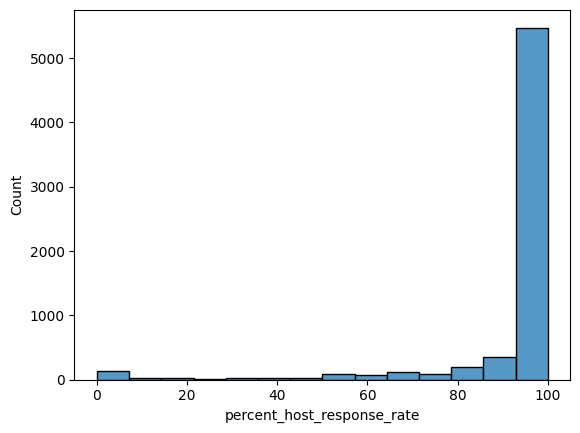

In [ ]:
# Distribusi kolom percent_host_response_rate
sns.histplot(data=listings_filtered, x="percent_host_response_rate")

Karena distribusinya tidak normal, kita akan menggunakan median untuk menginput missing values pada kolom percent_host_response_rate

In [ ]:
# mencari median kolom percent_host_response_rate
median_percent_host_response_rate = listings_filtered.percent_host_response_rate.median()

# menginput nan dengan median
listings_filtered.percent_host_response_rate.fillna(median_percent_host_response_rate, inplace=True)

/tmp/ipython-input-3776623895.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_filtered.percent_host_response_rate.fillna(median_percent_host_response_rate, inplace=True)


Kita akan melakukan pengecekan kembali missing values pada data, untuk memastikan semua missing values sudah ditangani

In [ ]:
# cek jumlah missing values
listings_filtered.isna().sum()

,0
id,0
host_name,4
host_since,4
host_response_time,0
percent_host_response_rate,0
property_type,0
accommodates,0
bathrooms,3791
bedrooms,0
price,3847


4. Pengecekan duplikat

In [ ]:
# cek jika terdapat data duplikat
listings_filtered[listings_filtered.duplicated()]

,id,host_name,host_since,host_response_time,percent_host_response_rate,property_type,accommodates,bathrooms,bedrooms,price,number_of_reviews


Terlihat dataset ini tidak memiliki data duplikat

5. Pengecekan Konsistensi



Kita akan melakukan pengecekan konsistensi penulisan pada kolom-kolom kategori. Kali ini kita akan melihat data unik pada kolom property_type

In [ ]:
# cek jumlah data unik pada property type
n_unique = listings_filtered.property_type.nunique()

print(f"Jumlah data unik pada kolom property type: {n_unique}")

Jumlah data unik pada kolom property type: 65


In [ ]:
# cek data unik pada property type
listings_filtered.property_type.unique()

array(['Private room in houseboat', 'Private room in rental unit',
       'Private room in condo', 'Entire rental unit',
       'Entire guest suite', 'Entire condo', 'Entire townhouse',
       'Entire loft', 'Private room in home', 'Private room in boat',
       'Private room in bed and breakfast', 'Entire home',
       'Room in boutique hotel', 'Private room in loft',
       'Private room in guest suite', 'Private room in villa',
       'Entire guesthouse', 'Boat', 'Private room in townhouse',
       'Houseboat', 'Private room in farm stay',
       'Room in bed and breakfast', 'Private room in guesthouse',
       'Private room', 'Shared room in home', 'Private room in windmill',
       'Private room in cottage', 'Entire villa', 'Tiny home',
       'Private room in casa particular', 'Room in aparthotel', 'Barn',
       'Private room in bungalow', 'Private room in tiny home',
       'Entire cabin', 'Room in hotel', 'Entire place',
       'Private room in serviced apartment', 'Entire cot

Dari data diatas



*   Jumlah kategori properti cukup banyak yaitu 62.
*   Beberapa property type memiliki kata yang sama, seperti private room, shared room dll.

Kita akan mereduksi jumlah kategori ini, dengan cara:


*   Jika kategori mengandung kata Private room makan akan dijadikan kategori private room
*   Jika kategori mengandung kata Shared room makan akan dijadikan kategori shared room

*   Jika kategori mengandung kata Entire makan akan dijadikan kategori Entire Home/apt
*   Selain itu diganti menjadi others






In [ ]:
# menyeragamkan kategori yang mengandung private room
listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'private room' if 'Private room' in x else x)

# menyeragamkan kategori yang mengandung shared room
listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'shared room' if 'Shared room' in x else x)

# menyeragamkan kategori yang mengandung Entire
listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'entire home/apt' if 'Entire' in x else x)

# menyeragamkan kategori yang tidak mengandung Entire shared dan private menjadi others
listings_filtered.property_type = listings_filtered.property_type.apply(lambda x: 'others' if ('entire' not in x
                                                                                               and 'private' not in x
                                                                                               and 'shared' not in x) else x)

Setelah mengatasi datanya kita lakukan pengecekan sekali lagi

In [ ]:
# cek data unik pada property type
listings_filtered.property_type.unique()

array(['private room', 'entire home/apt', 'others', 'shared room'],
      dtype=object)

6. Handling Outlier

* Outlier biasanya terdapat pada kolom bertipe numeric.
* Pada kasus kali ini, kita akan mengidentifikasi outlier pada kolom price.
* Kita dapat menampilkan sebaran data price menggunakan histogram

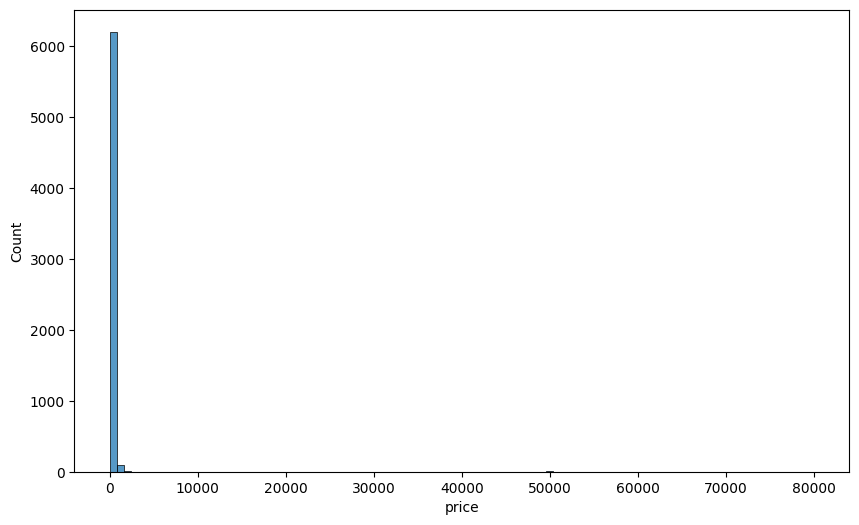

In [ ]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.histplot(data = listings_filtered,
             x = "price",
             bins = 100,
             ax = ax)

plt.show()

* Terlihat skala dari x axis mencapai 80000.
* Hal ini terjadi karena terdapat data yang nilainya mendekati 80000.
* Hal ini bisa di validasi dengan melihat deskripsi statistik dari kolom price

In [ ]:
# Deskripsi statistik dari kolom price
listings_filtered["price"].describe()

,price
count,6321.000000
mean,364.922164
std,2288.990696
min,8.000000
25%,162.000000
50%,223.000000
75%,315.000000
max,80018.000000


* Terlihat nilai maksimum dari kolom price berada di angka 80018.
* Angka ini sangat jauh dibanding nilai Q3 sebesar 315.
* Data di atas Q3 memiliki potensi sebagai outlier
* Kita asumsikan memang ada outlier

https://muhammadrendy.quarto.pub/quarto_web/posts/Identifikasi_Outlier_Dalam_R/




Kita akan tentukan suatu data adalah outlier, apabila nilainya lebih besar dari Q3 + 1.5 IQR

In [ ]:
# Cari Q1 & Q3
Q1 = listings_filtered.price.quantile(0.25)
Q3 = listings_filtered.price.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")

Q1 : 162.00
Q3 : 315.00


In [ ]:
# Cari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")

IQR : 153.00
Maximum Boundary : 544.50


In [ ]:
# Filter data tanpa outlier
listings_filtered = listings_filtered[listings_filtered["price"] < max_bound]

In [ ]:
# Validasi hasil filter
listings_filtered["price"].describe()

,price
count,5984.000000
mean,233.609291
std,102.663794
min,8.000000
25%,158.000000
50%,215.000000
75%,296.000000
max,544.000000


Terlihat Q3 dan nilai maximum sudah tidak berbeda jauh
Outlier telah dihilangkan

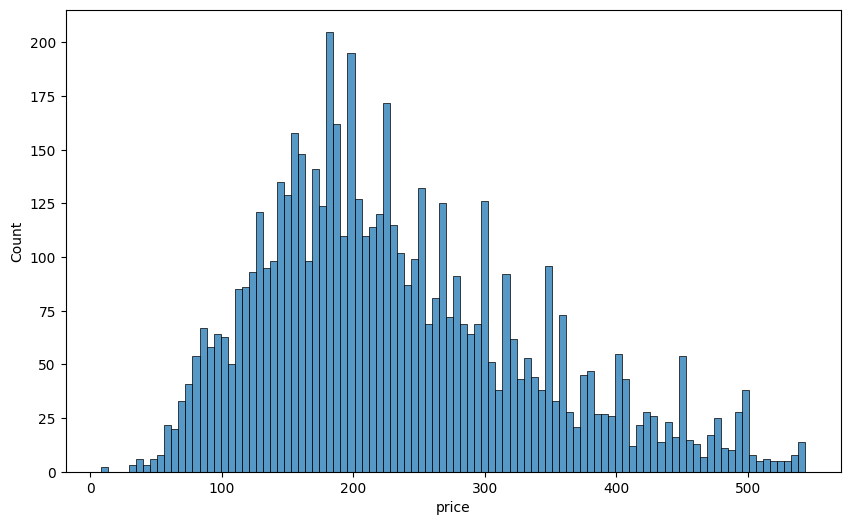

In [ ]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.histplot(data = listings_filtered,
             x = "price",
             bins = 100,
             ax = ax)

plt.show()

**Analysis**

Dalam studi kasus kali ini kita akan mencari informasi:

1. Jumlah host yang mendaftar dari tahun ke tahun
2. Jumlah host yang response ratenya diatas 70% di masing-masing tipe property
3. Distribusi response time host
4. Rata-rata review masing masing tipe property

1. Jumlah host yang mendaftar dari tahun ke tahun

Untuk melakukan ini kita akan meng-ekstrak data tahun dari data tanggal host_since

In [ ]:
listings_filtered["year"] = listings_filtered.host_since.dt.year
listings_filtered

,id,host_name,host_since,host_response_time,percent_host_response_rate,property_type,accommodates,bathrooms,bedrooms,price,number_of_reviews,year
0,27886,Flip,2010-03-23,within an hour,100.0,private room,2,1.5,1.0,132.0,302,2010.0
1,28871,Edwin,2010-05-13,within an hour,100.0,private room,2,1.0,1.0,78.0,710,2010.0
2,29051,Edwin,2010-05-13,within an hour,100.0,private room,2,1.0,1.0,70.0,822,2010.0
4,47061,Ivar,2010-08-24,within a few hours,100.0,entire home/apt,3,1.5,2.0,120.0,203,2010.0
6,49552,Joanna & MP,2010-09-06,within an hour,100.0,entire home/apt,3,1.0,2.0,284.0,599,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10163,1437492870456891135,Mirte Renée,2025-06-06,within an hour,100.0,entire home/apt,4,1.0,3.0,258.0,0,2025.0
10164,1437585511300942515,Willemijn,2013-06-29,within an hour,100.0,entire home/apt,4,1.5,2.0,350.0,0,2013.0
10165,1437601466510408215,Anna,2016-02-10,within an hour,100.0,entire home/apt,2,1.0,1.0,263.0,0,2016.0
10166,1437660079651924451,Hedwig,2024-05-06,within a day,80.0,entire home/apt,3,1.0,1.0,300.0,0,2024.0


Untuk mendapatkan jumlah host yang mendaftar tiap tahun, kita akan mengelompokkan data berdasarkan tahun dan menghitung jumlah idnya

In [ ]:
# jumlah host yang mendaftar tiap tahun
registred_host_each_year = listings_filtered.groupby("year").count()[["id"]]
registred_host_each_year

,id
year,
2008.0,1
2009.0,4
2010.0,38
2011.0,130
2012.0,451
2013.0,706
2014.0,896
2015.0,848
2016.0,752


Agar lebih intuitif kita akan memvisualkan data tersebut

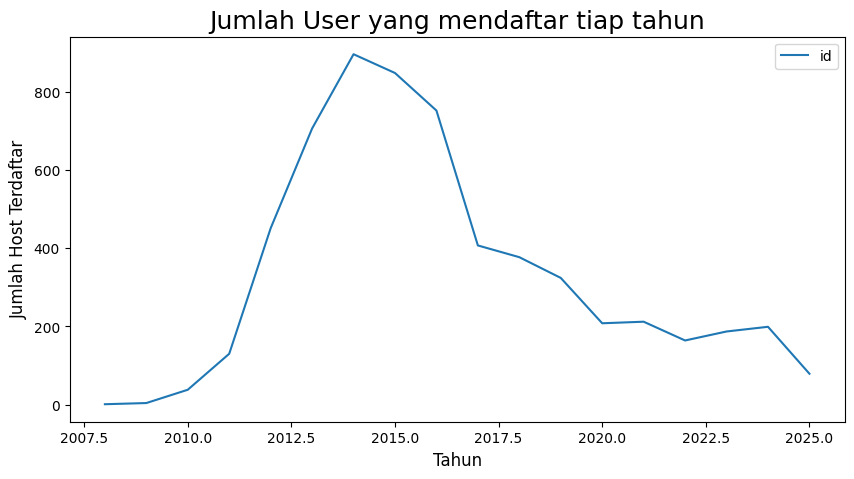

In [ ]:
# customer ukuran figure
fig, ax = plt.subplots(figsize=(10, 5))

# membuat plot
sns.lineplot(data=registred_host_each_year, ax=ax)

# menambahkan judul
ax.set_title("Jumlah User yang mendaftar tiap tahun", fontsize=18)

# menambahkan label
ax.set_xlabel("Tahun", fontsize=12)
ax.set_ylabel("Jumlah Host Terdaftar", fontsize=12)

plt.show()

Dari visualisasi diatas:

* Mulai tahun 2010 banyak host yang mulai mendaftarkan propertinya ke Air BnB hingga mencapai puncak tertinggi di tahun 2014 sebanyak 896 Host baru.
* Setelah tahun 2016 hingga 2025, jumlah host baru yang terdaftar mulai berkurang

2. Jumlah host yang response ratenya diatas 70% di masing-masing tipe property


Untuk mendapatkan informasi ini, kita akan memfilter terlebih dahulu data yang response ratenya diatas 70%

In [ ]:
# filter data berdasarkan persentase response
response_abv_70 = listings_filtered[listings_filtered["percent_host_response_rate"] > 70]
n_response_abv_70_by_property_type = response_abv_70.groupby("property_type").count()[["id"]].reset_index()
n_response_abv_70_by_property_type

,property_type,id
0,entire home/apt,3936
1,others,447
2,private room,1135
3,shared room,25


Agar lebih intuitive kita coba visualkan menggunakan barplot

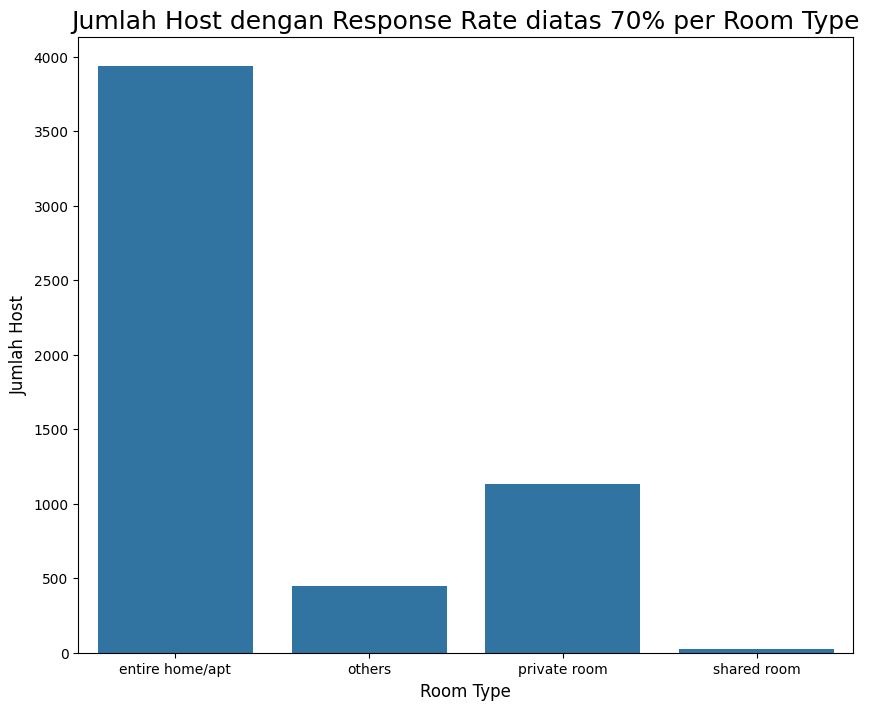

In [ ]:
# customer ukuran figure
fig, ax = plt.subplots(figsize=(10, 8))

# membuat plot
sns.barplot(data=n_response_abv_70_by_property_type, x="property_type", y="id", ax=ax)

# menambahkan judul
ax.set_title("Jumlah Host dengan Response Rate diatas 70% per Room Type", fontsize=18)

# menambahkan label
ax.set_xlabel("Room Type", fontsize=12)
ax.set_ylabel("Jumlah Host", fontsize=12)

plt.show()

Dari data diatas:

* Host yang memiliki kategori property entire home/apt memiliki response rate yang paling tinggi dibanding yang lain
* Hanya sedikit host yang memiliki kategori properti shared room yang memiliki response rate diatas 70%

3. Distribusi response time host

Untuk melakukan mencari jumlah dari masing-masing kategori respon time, kita akan mengelempokkan berdasarkan response time

In [ ]:
# Menghitung jumlah masing-masing response time
n_response_time = listings_filtered.groupby("host_response_time").count()[["id"]].reset_index()
n_response_time

,host_response_time,id
0,a few days or more,225
1,within a day,1179
2,within a few hours,1279
3,within an hour,3301


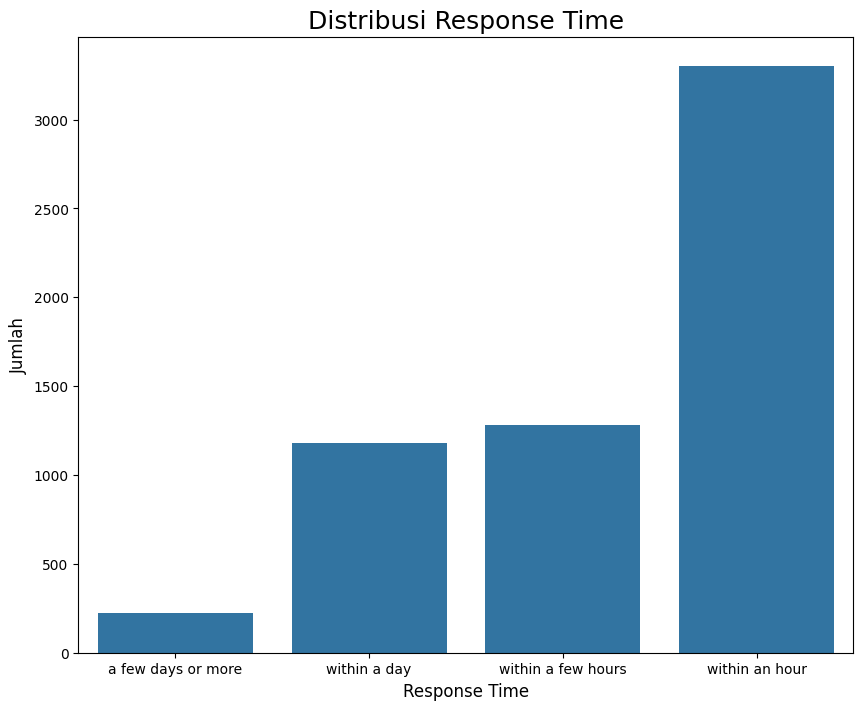

In [ ]:
# customer ukuran figure
fig, ax = plt.subplots(figsize=(10, 8))

# membuat plot
sns.barplot(data=n_response_time, x="host_response_time", y="id", ax=ax)

# menambahkan judul
ax.set_title("Distribusi Response Time", fontsize=18)

# menambahkan label
ax.set_xlabel("Response Time", fontsize=12)
ax.set_ylabel("Jumlah", fontsize=12)

plt.show()

Dari data diatas:

Sebagian besar host merespon dalam kurun waktu satu jam

4. Rata-rata jumlah review masing masing tipe property

Untuk melakukan ini kita akan mengelompokkan data berdasarkan tipe properti dan menghitung rata-rata review di masing-masing tipe properti

In [ ]:
# rata-rata jumlah review tiap room type
mean_review_by_room_type = listings_filtered.groupby("property_type")[["number_of_reviews"]].mean().reset_index()
mean_review_by_room_type

,property_type,number_of_reviews
0,entire home/apt,27.486511
1,others,100.991285
2,private room,184.391566
3,shared room,101.769231


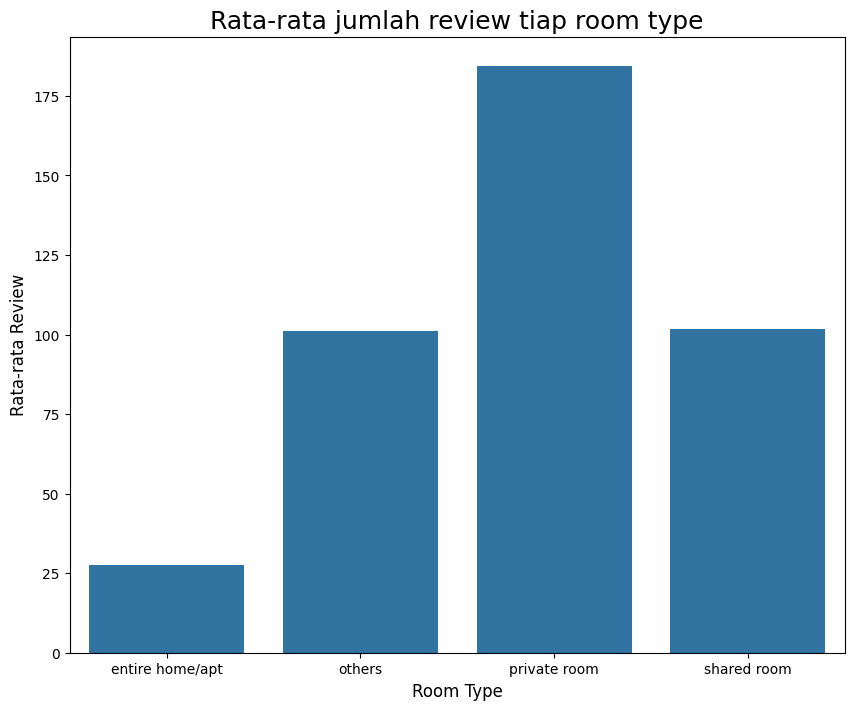

In [ ]:
# customer ukuran figure
fig, ax = plt.subplots(figsize=(10, 8))

# membuat plot
sns.barplot(data=mean_review_by_room_type, x="property_type", y="number_of_reviews", ax=ax)

# menambahkan judul
ax.set_title("Rata-rata jumlah review tiap room type", fontsize=18)

# menambahkan label
ax.set_xlabel("Room Type", fontsize=12)
ax.set_ylabel("Rata-rata Review", fontsize=12)

plt.show()

Dari data diatas:

* Private room menjadi kategori property yang rata-rata jumlah reviewnya paling tinggi.
* Kategori entire home/apt memiliki rata-rata review yang rendah dibanding yang lain